# Importing Libs

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [11]:
df_train = pd.read_csv('/Users/harmansingh/AI Engineering/Deep Learning/Recurrent Neural Networks (RNN)/Project /Google_train.csv')
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100
1,2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800
2,2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300
3,2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600
4,2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300
...,...,...,...,...,...,...,...
1545,2022-02-22,2596.760010,2643.610107,2564.469971,2596.270020,2596.270020,2249500
1546,2022-02-23,2632.969971,2641.020020,2550.550049,2551.760010,2551.760010,1639300
1547,2022-02-24,2499.070068,2660.000000,2499.070068,2653.820068,2653.820068,2722800
1548,2022-02-25,2671.040039,2705.429932,2635.030029,2689.189941,2689.189941,1820300


In [13]:
df_test = pd.read_csv('/Users/harmansingh/AI Engineering/Deep Learning/Recurrent Neural Networks (RNN)/Project /Google_test.csv')
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-01,2697.570068,2725.110107,2664.370117,2681.229980,2681.229980,1324800
1,2022-03-02,2692.560059,2705.250000,2661.429932,2691.429932,2691.429932,1176000
2,2022-03-03,2720.199951,2728.790039,2660.510010,2677.989990,2677.989990,1230200
3,2022-03-04,2658.550049,2677.030029,2606.750000,2638.129883,2638.129883,1521500
4,2022-03-07,2629.760010,2634.699951,2525.899902,2527.570068,2527.570068,2255600
5,2022-03-08,2525.000000,2625.000000,2513.489990,2542.090088,2542.090088,2021400
6,2022-03-09,2625.000000,2674.709961,2598.010010,2668.399902,2668.399902,1851300
7,2022-03-10,2625.320068,2665.439941,2618.250000,2648.590088,2648.590088,1355100
8,2022-03-11,2669.770020,2675.909912,2592.629883,2597.409912,2597.409912,1572700
9,2022-03-14,2605.000000,2608.179932,2505.500000,2519.020020,2519.020020,1940600


In [72]:
training_set = df_train.iloc[:,1:2].values
real_set = df_test.iloc[:,1:2].values

In [19]:
training_set

array([[ 762.200012],
       [ 764.099976],
       [ 750.369995],
       ...,
       [2499.070068],
       [2671.040039],
       [2661.      ]])

In [73]:
real_set

array([[2697.570068],
       [2692.560059],
       [2720.199951],
       [2658.550049],
       [2629.76001 ],
       [2525.      ],
       [2625.      ],
       [2625.320068],
       [2669.77002 ],
       [2605.      ],
       [2539.52002 ],
       [2614.659912],
       [2662.97998 ],
       [2668.48999 ],
       [2723.27002 ],
       [2722.030029],
       [2774.050049],
       [2784.      ]])

## Feature Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled= sc.fit_transform(training_set)

# Creating Data Structure

In [31]:
x_train=[]
y_train=[]

for i in range(60,1550):
    x_train.append( training_set_scaled[i-60:i,0] )
    y_train.append( training_set_scaled[i,0] )

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(1490, 60)


## Reshaping

In [35]:
x_train = x_train.reshape( (x_train.shape[0], x_train.shape[1], 1) )
print(x_train.shape)

(1490, 60, 1)


# Building RNN

In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [43]:
regressor = Sequential()

2025-09-14 23:16:59.311396: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-14 23:16:59.312186: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-14 23:16:59.312216: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-09-14 23:16:59.312396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-14 23:16:59.312496: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [46]:
# Adding LSTM layer
regressor.add( LSTM( units =64, activation = 'tanh', recurrent_activation = 'sigmoid', return_sequences=True, input_shape= (x_train.shape[1], 1)))
regressor.add( Dropout(0.2) )

2025-09-14 23:17:07.980070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-09-14 23:17:07.981006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-09-14 23:17:07.981572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [49]:
# Adding Second Layer
regressor.add( LSTM( units =64, activation = 'tanh', recurrent_activation = 'sigmoid', return_sequences=True ) )
regressor.add( Dropout(0.2) )

2025-09-14 23:17:16.627787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-09-14 23:17:16.628727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-09-14 23:17:16.629210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [52]:
# Adding Third Layer
regressor.add( LSTM( units =64, activation = 'tanh', recurrent_activation = 'sigmoid', return_sequences=True ) )
regressor.add( Dropout(0.2) )

2025-09-14 23:17:24.737030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-09-14 23:17:24.738082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-09-14 23:17:24.738709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [55]:
# Adding Fourth Layer
regressor.add( LSTM( units =64, activation = 'tanh', recurrent_activation = 'sigmoid') )
regressor.add( Dropout(0.2) )

2025-09-14 23:17:35.334999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-09-14 23:17:35.335947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-09-14 23:17:35.336468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [58]:
# Output Layer
regressor.add( Dense(1) )

# Compile RNN

In [62]:
regressor.compile( optimizer='adam', loss= 'mean_squared_error')

# Fitting RNN

In [66]:
regressor.fit( x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100


2025-09-14 23:18:27.891635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-09-14 23:18:27.892646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-09-14 23:18:27.893233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 3/94 [..............................] - ETA: 2s - loss: 0.0973  

2025-09-14 23:18:30.795347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 6s 30ms/step - loss: 0.0083
Epoch 2/100
94/94 [==============================] - 3s 28ms/step - loss: 0.0015
Epoch 3/100
94/94 [==============================] - 3s 28ms/step - loss: 0.0016
Epoch 4/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0016
Epoch 5/100
94/94 [==============================] - 3s 28ms/step - loss: 9.7609e-04
Epoch 6/100
94/94 [==============================] - 3s 28ms/step - loss: 8.8755e-04
Epoch 7/100
94/94 [==============================] - 3s 28ms/step - loss: 8.8577e-04
Epoch 8/100
94/94 [==============================] - 3s 28ms/step - loss: 9.0809e-04
Epoch 9/100
94/94 [==============================] - 3s 28ms/step - loss: 8.8285e-04
Epoch 10/100
94/94 [==============================] - 3s 28ms/step - loss: 7.5782e-04
Epoch 11/100
94/94 [==============================] - 3s 28ms/step - loss: 8.2837e-04
Epoch 12/100
94/94 [==============================] - 3s 28ms/step - loss: 7.5457e-04
Epoch

# Making Predictions and Visualizing the Results

## Making Complete Dataset

In [77]:
df_total = pd.concat( (df_train['Open'], df_test['Open']), axis=0)

## Making Test set

In [107]:
inputs = df_total[ len(df_total) - len(df_test) - 60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform ( inputs)

In [109]:
x_test=[]
for i in range (60,78):
    x_test.append( inputs[i-60:i,0] )

x_test = np.array(x_test)

In [111]:
x_test = x_test.reshape( (x_test.shape[0], x_test.shape[1], 1) )

## Prediction

In [114]:
predicted_stock_price = regressor.predict(x_test)

1/1 [==============================] - 0s 30ms/step


In [116]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price )

## Visualizing

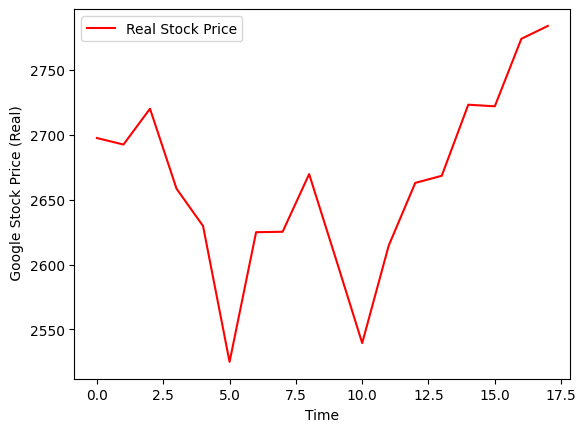

In [119]:
# Real Stock Price
plt.plot( real_set, color='red', label='Real Stock Price') 
plt.xlabel('Time')
plt.ylabel(' Google Stock Price (Real)' )
plt.legend()
plt.show()

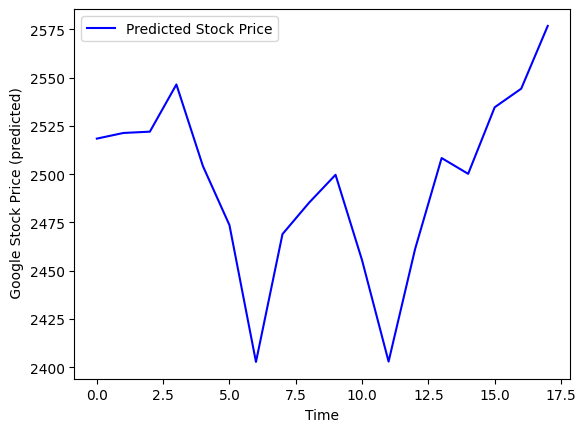

In [121]:
# Predicted Stock Price
plt.plot( predicted_stock_price, color='blue', label='Predicted Stock Price') 
plt.xlabel('Time')
plt.ylabel(' Google Stock Price (predicted)' )
plt.legend()
plt.show()

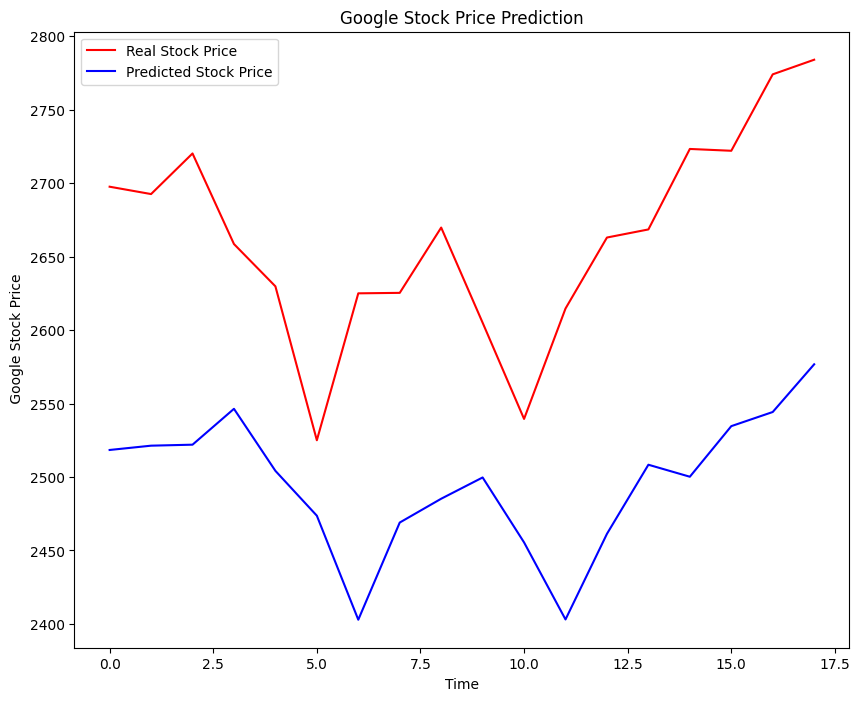

In [123]:
# Comparing these Two
plt.figure(figsize=(10,8))
plt.plot( real_set, color='red', label='Real Stock Price') 
plt.plot( predicted_stock_price, color='blue', label='Predicted Stock Price') 
plt.title( 'Google Stock Price Prediction' )
plt.xlabel('Time')
plt.ylabel(' Google Stock Price' )
plt.legend()
plt.show()